In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Mal' in f.name]

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf')]

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family="Malgun Gothic")

In [4]:
resort_data = pd.read_csv("data.resort_data_p.csv", index_col='Unnamed: 0')
city_data = pd.read_csv("data/city_data_p.csv", index_col='Unnamed: 0')

# change_room에 따른 취소여부 분석

In [5]:
data1_r = resort_data.groupby(['change_room', 'is_canceled'], as_index=False).count()
data1_c = city_data.groupby(['change_room', 'is_canceled'], as_index=False).count()
data1_r = data1_r[['change_room', 'is_canceled', 'arrival_date_year']]
data1_c = data1_c[['change_room', 'is_canceled', 'arrival_date_year']]
data1_r = data1_r.rename({'arrival_date_year':'count'}, axis=1)
data1_c = data1_c.rename({'arrival_date_year':'count'}, axis=1)

In [6]:
data1_r

,change_room,is_canceled,count
0,0,0,21593
1,0,1,10736
2,1,0,7334
3,1,1,384


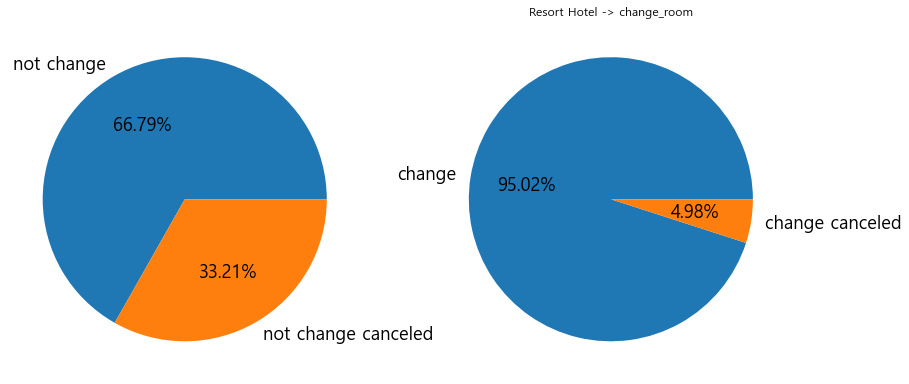

In [12]:
# Resort Hotel의 예약된 방과 할당된 방의 차이여부에 따른 취소비율 분석

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 12))
axes[0].pie(data1_r['count'][0:2], labels = ['not change', 'not change canceled'], autopct=lambda p : '{:.2f}%'.format(p), textprops={'fontsize': 18})
axes[1].pie(data1_r['count'][2:4], labels = ['change', 'change canceled'],autopct=lambda p : '{:.2f}%'.format(p), textprops={'fontsize': 18})

plt.title('Resort Hotel -> change_room')

plt.show()

In [9]:
data1_c

,change_room,is_canceled,count
0,0,0,39423
1,0,1,32662
2,1,0,6661
3,1,1,417


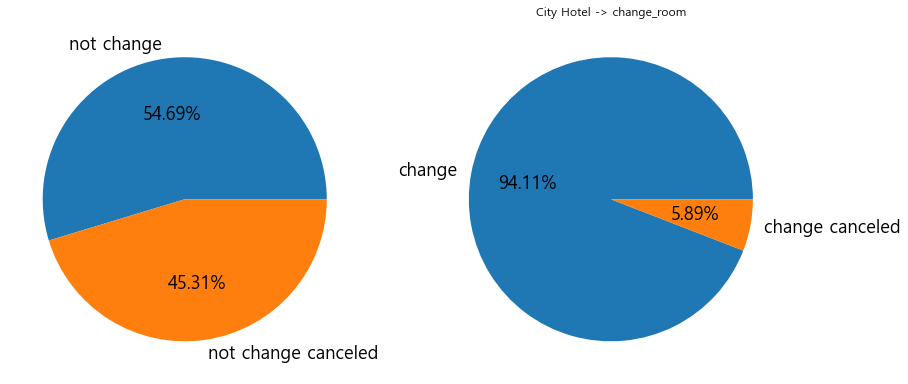

In [14]:
# City Hotel의 예약된 방과 할당된 방의 차이여부에 따른 취소비율 분석

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 12))
axes[0].pie(data1_c['count'][0:2], labels = ['not change', 'not change canceled'], autopct=lambda p : '{:.2f}%'.format(p), textprops={'fontsize': 18})
axes[1].pie(data1_c['count'][2:4], labels = ['change', 'change canceled'],autopct=lambda p : '{:.2f}%'.format(p), textprops={'fontsize': 18})

plt.title('City Hotel -> change_room')
plt.show()

# lead_term에 따른 취소여부 분석

In [34]:
data3_r = resort_data.groupby(['lead_term'], as_index=False).mean()
data3_c = city_data.groupby(['lead_term'], as_index=False).mean()
data3_r = data3_r[['lead_term', 'is_canceled']]
data3_c = data3_c[['lead_term', 'is_canceled']]
data3_r = data3_r.rename({'is_canceled':'mean'}, axis=1)
data3_c = data3_c.rename({'is_canceled':'mean'}, axis=1)

In [35]:
data3_r

,lead_term,mean
0,1.0,0.129369
1,2.0,0.324574
2,3.0,0.374361
3,4.0,0.412740
4,5.0,0.466216


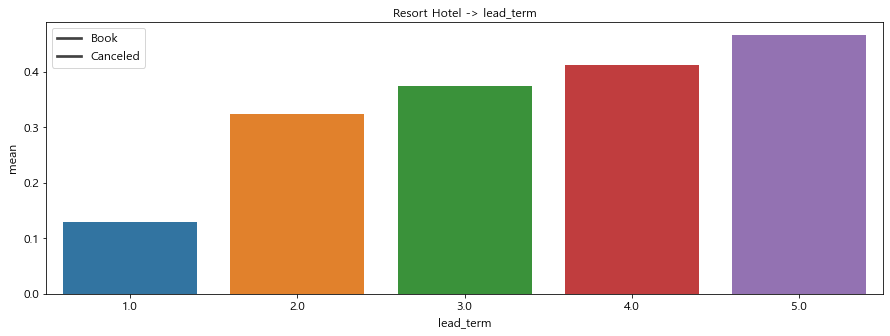

In [36]:
plt.figure(figsize=(15,5))

sns.barplot(data = data3_r, x= "lead_term", y="mean")
plt.title('Resort Hotel -> lead_term')
plt.legend(["Book", "Canceled"])
plt.show()

In [37]:
data3_c

,lead_term,mean
0,1.0,0.223025
1,2.0,0.399499
2,3.0,0.480281
3,4.0,0.627301
4,5.0,0.711062


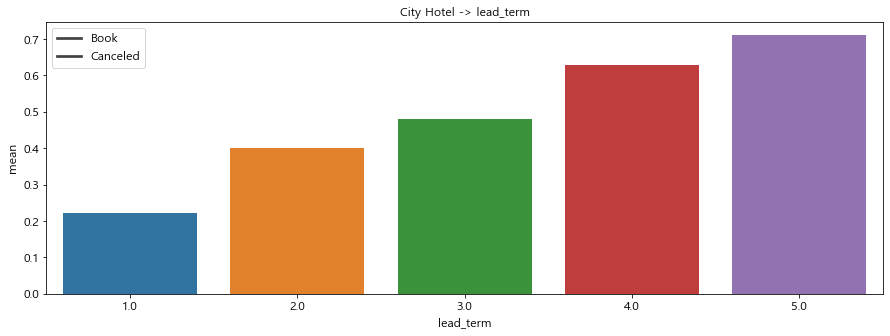

In [38]:
plt.figure(figsize=(15,5))

sns.barplot(data = data3_c, x= "lead_term", y="mean")
plt.title('City Hotel -> lead_term')
plt.legend(["Book", "Canceled"])
plt.show()

# precan_bool에 따른 취소여부 분석

In [15]:
data5_r = resort_data.groupby(['precan_bool', 'is_canceled'], as_index=False).count()
data5_c = city_data.groupby(['precan_bool', 'is_canceled'], as_index=False).count()
data5_r = data5_r[['precan_bool', 'is_canceled', 'arrival_date_year']]
data5_c = data5_c[['precan_bool', 'is_canceled', 'arrival_date_year']]
data5_r = data5_r.rename({'arrival_date_year':'count'}, axis=1)
data5_c = data5_c.rename({'arrival_date_year':'count'}, axis=1)

In [16]:
data5_r

,precan_bool,is_canceled,count
0,0,0,28756
1,0,1,10196
2,1,0,171
3,1,1,924


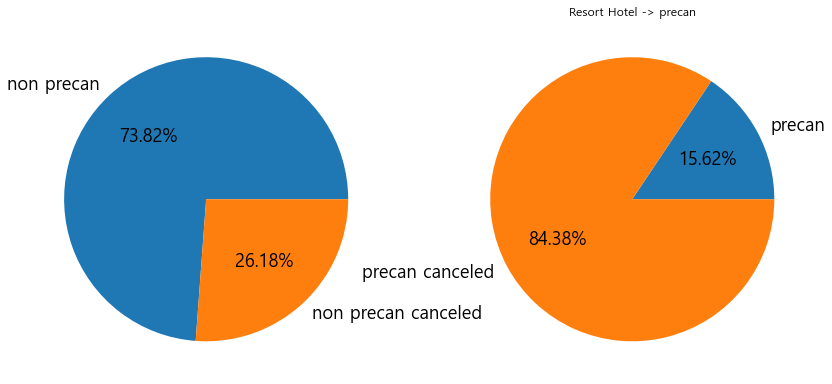

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 12))
axes[0].pie(data5_r['count'][0:2], labels = ['non precan', 'non precan canceled'], autopct=lambda p : '{:.2f}%'.format(p), textprops={'fontsize': 18})
axes[1].pie(data5_r['count'][2:4], labels = ['precan', 'precan canceled'],autopct=lambda p : '{:.2f}%'.format(p), textprops={'fontsize': 18})

plt.title('Resort Hotel -> precan')
plt.show()

In [18]:
data5_c

,precan_bool,is_canceled,count
0,0,0,45716
1,0,1,28063
2,1,0,368
3,1,1,5016


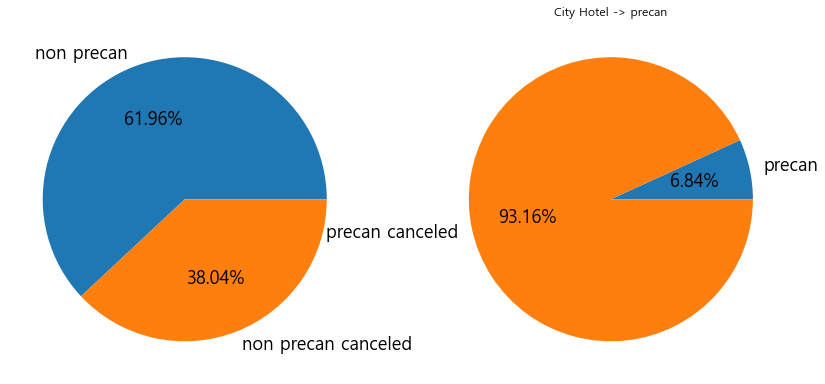

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 12))
axes[0].pie(data5_c['count'][0:2], labels = ['non precan', 'non precan canceled'], autopct=lambda p : '{:.2f}%'.format(p), textprops={'fontsize': 18})
axes[1].pie(data5_c['count'][2:4], labels = ['precan', 'precan canceled'],autopct=lambda p : '{:.2f}%'.format(p), textprops={'fontsize': 18})

plt.title('City Hotel -> precan')
plt.show()